In [ ]:
#train custom word2vec on small domain specific dataset , analyze embeddings capturing domain specific semantics
%pip install gensim matplotlib scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 606.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

training word2vec model
model training complete


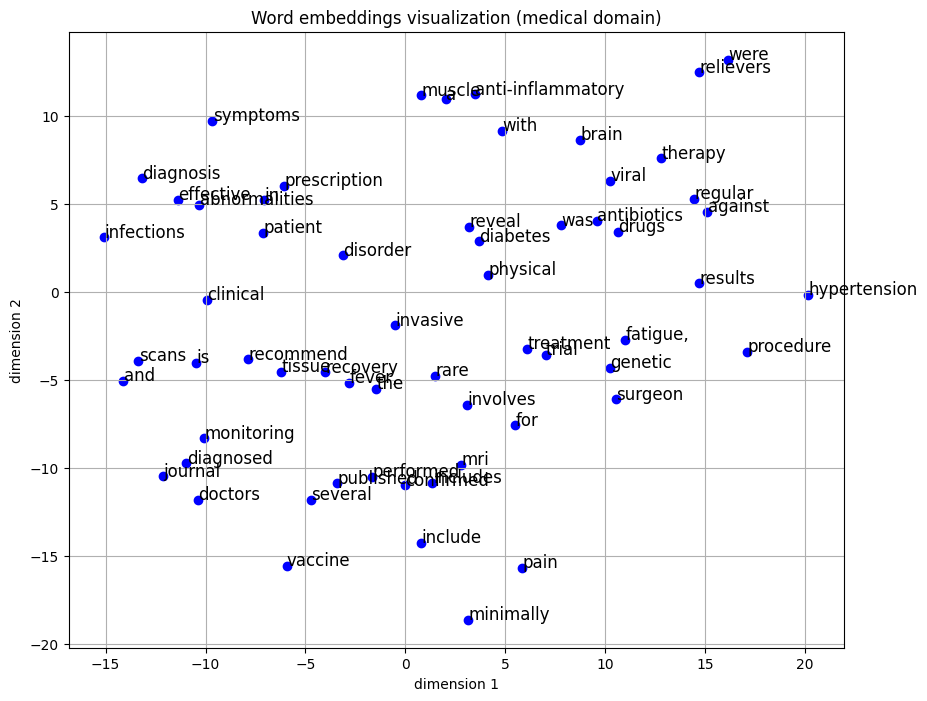

words similar to 'treatment':
trial : 0.33
effective : 0.19
in : 0.19
symptoms : 0.17
doctors : 0.17
words similar to 'vaccine':
brain : 0.25
doctors : 0.20
invasive : 0.19
physical : 0.19
pain : 0.18


In [ ]:
medical_corpus = ["The patient was diagnosed with diabetes and hypertension",
                  "MRI scans reveal abnormalities in the brain tissue",
                  "The treatment involves antibiotics and regular monitoring",
                  "Symptoms include fever, fatigue, and muscle pain",
                  "The vaccine is effective against several viral infections",
                  "Doctors recommend physical therapy for recovery",
                  "The clinical trial results were published in the journal",
                  "The surgeon performed a minimally invasive procedure",
                  "The prescription includes pain relievers and anti-inflammatory drugs",
                  "The diagnosis confirmed a rare genetic disorder"]
processed_corpus = [sentence.lower().split() for sentence in medical_corpus]
print("training word2vec model")
model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, workers=4, epochs=50)
print("model training complete!")

#extract embeddings for visualization
words = list(model.wv.index_to_key)
embeddings = np.array([model.wv[word] for word in words])

#tsne
tsne = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=300)###########
tsne_result = tsne.fit_transform(embeddings)

#visualization
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], color="blue")
for i, word in enumerate(words):
  plt.text(tsne_result[i, 0]+0.02, tsne_result[i, 1]+0.02, word, fontsize=12)
plt.title("\n  Word embeddings visualization (medical domain)")
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.grid(True)
plt.show()


#analyze domain specific semantics
def find_similar_words(input_word, top_n=5):
  try:
    similar_words = model.wv.most_similar(input_word, topn=top_n)
    print(f"\n  words similar to '{input_word}':")
    for word, similarity in similar_words:
      print(f"{word} : {similarity:.2f}")
  except KeyErrora as e:
    print(f"Error: {e} not found in vocabulary")

find_similar_words("treatment")
find_similar_words("vaccine")

VIVA

----
1. What is the significance of Cohere, LangChain, and Pydantic?

- Cohere: Provides NLP APIs including embeddings, classification, and summarization via LLMs. Used for model inference.

- LangChain: Framework to build applications powered by LLMs. It connects LLMs with tools like memory, APIs, and agents.

- Pydantic: Used for data validation and parsing using Python type hints. Useful in defining schemas and ensuring structured output from LLMs.

----

2. Explain the techniques used in word embeddings.

- Traditional: One-hot encoding, Bag of Words (BoW), TF-IDF.

- Neural: Word2Vec (CBOW, Skip-gram), GloVe (co-occurrence matrix), FastText (subword n-grams), BERT (contextual embeddings).

----

3. Why do we use word embeddings?/ Need for word embeddings.

- To reduce dimensionality and sparsity.

- To capture semantic and syntactic meanings.

- To enable words with similar meanings to have similar representations.

----

4. Discuss the real-world applications of LLMs and their limitations.

- Applications: Chatbots, summarization, code generation, sentiment analysis, content creation.

- Limitations: Bias in training data, hallucination, high computational cost, lack of real-time awareness.

----

5. Which model is used for summarization?

- Pre-trained summarization model from Hugging Face (facebook/bart-large-cnn)

----

6. Explain the BART model in detail.

- BART (Bidirectional and Auto-Regressive Transformer) combines BERT (encoding) and GPT (decoding).

- It is a sequence-to-sequence model used for text generation, summarization, translation, etc.

- Trained by corrupting text and learning to reconstruct it.

----

7. What is sentiment analysis and its applications?

- It is the process of identifying sentiment (positive, negative, neutral) from text.

- Applications: Customer feedback, brand monitoring, political analysis, market research.

----

8. Discuss and explain the significance of the parameter perplexity in t-SNE.

- hyperparameter that defines the effective number of neighbors.

- Controls the balance between local(less perplexity) vs. global(more perplexity) structure.

- Should be less than the number of data points; typical range: 5–50.

----

9. Describe the algorithm (step-by-step, in words) for building an IPC chatbot.

a. Download the Indian Penal Code document.

b. Preprocess and split the document into retrievable chunks.

c. Use embeddings to store the chunks in a vector store.

d. Accept user queries.

e. Retrieve relevant sections using similarity search.

f. Use LLM (via LangChain) to answer based on the retrieved context.

----

10. Discuss PCA and t-SNE.

- PCA: Linear, preserves global variance, faster, used for large datasets.

- t-SNE: Non-linear, preserves local relationships, ideal for visualizing word clusters in small data.

- Used to visualize high-dimensional word embeddings in 2D/3D.

----

11. What are the uses of prompt engineering?

- To control LLM outputs by carefully designing the input prompts.

- Used in chatbots, summarization, translation, data extraction, and few-shot learning.

----